In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Set Style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style("whitegrid")
sns.set_palette("husl")
%matplotlib inline

In [6]:
# Load data
df = pd.read_csv('../data/student_exam_scores.csv')
print(f"Dataset shape: {df.shape}")

# Display basic information
print("\n=== Dataset Overview ===")
print(df.info())

print("\n=== First 5 rows ===")
print(df.head())

print("\n=== Descriptive Statistics ===")
print(df.describe())

Dataset shape: (200, 6)

=== Dataset Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB
None

=== First 5 rows ===
  student_id  hours_studied  sleep_hours  attendance_percent  previous_scores  \
0       S001            8.0          8.8                72.1               45   
1       S002            1.3          8.6                60.7               55   
2       S003            4.0          8.2                73.7               86   
3       S004            3.5          4.8 

In [7]:
# Check for missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# Check for duplicates
print("\n=== Duplicate Rows ===")
print(f"Number of duplicate rows: {df.duplicated().sum()}")


=== Missing Values ===
student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

=== Duplicate Rows ===
Number of duplicate rows: 0


## Data Visualization

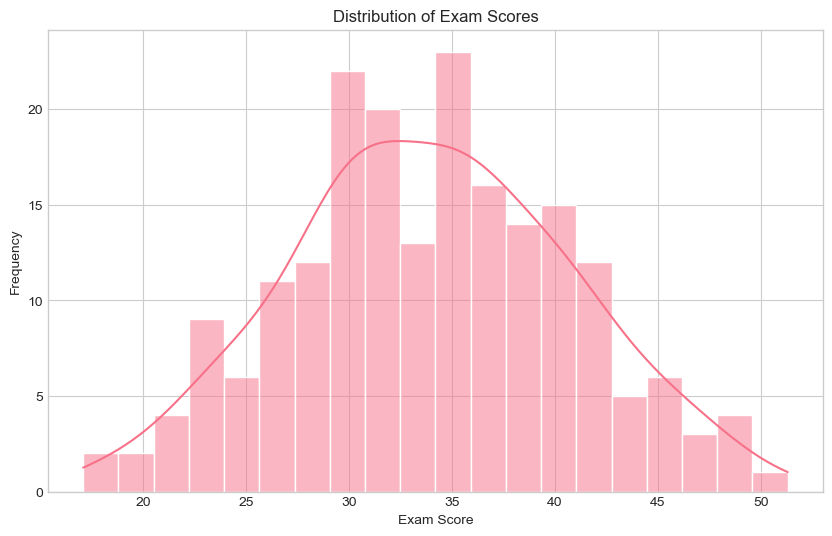

In [8]:
# 1. Distribution of exam scores
plt.figure(figsize=(10, 6))
sns.histplot(df['exam_score'], kde=True, bins=20)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

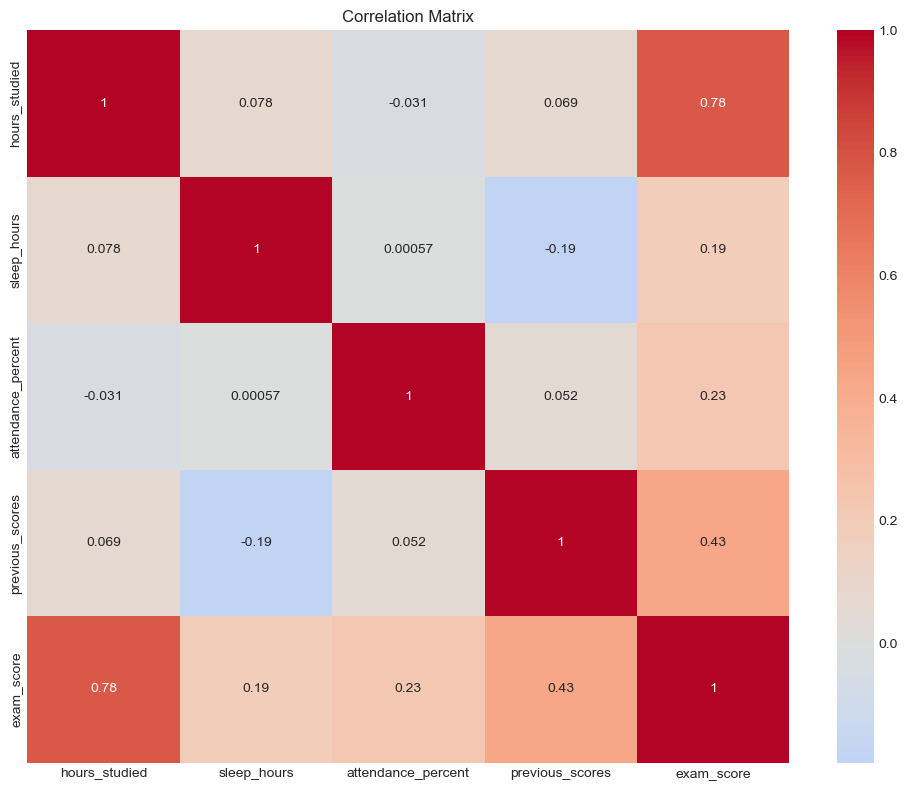

In [9]:
# 2. Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.drop('student_id', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('../reports/figures/correlation_matrix.png')
plt.show()

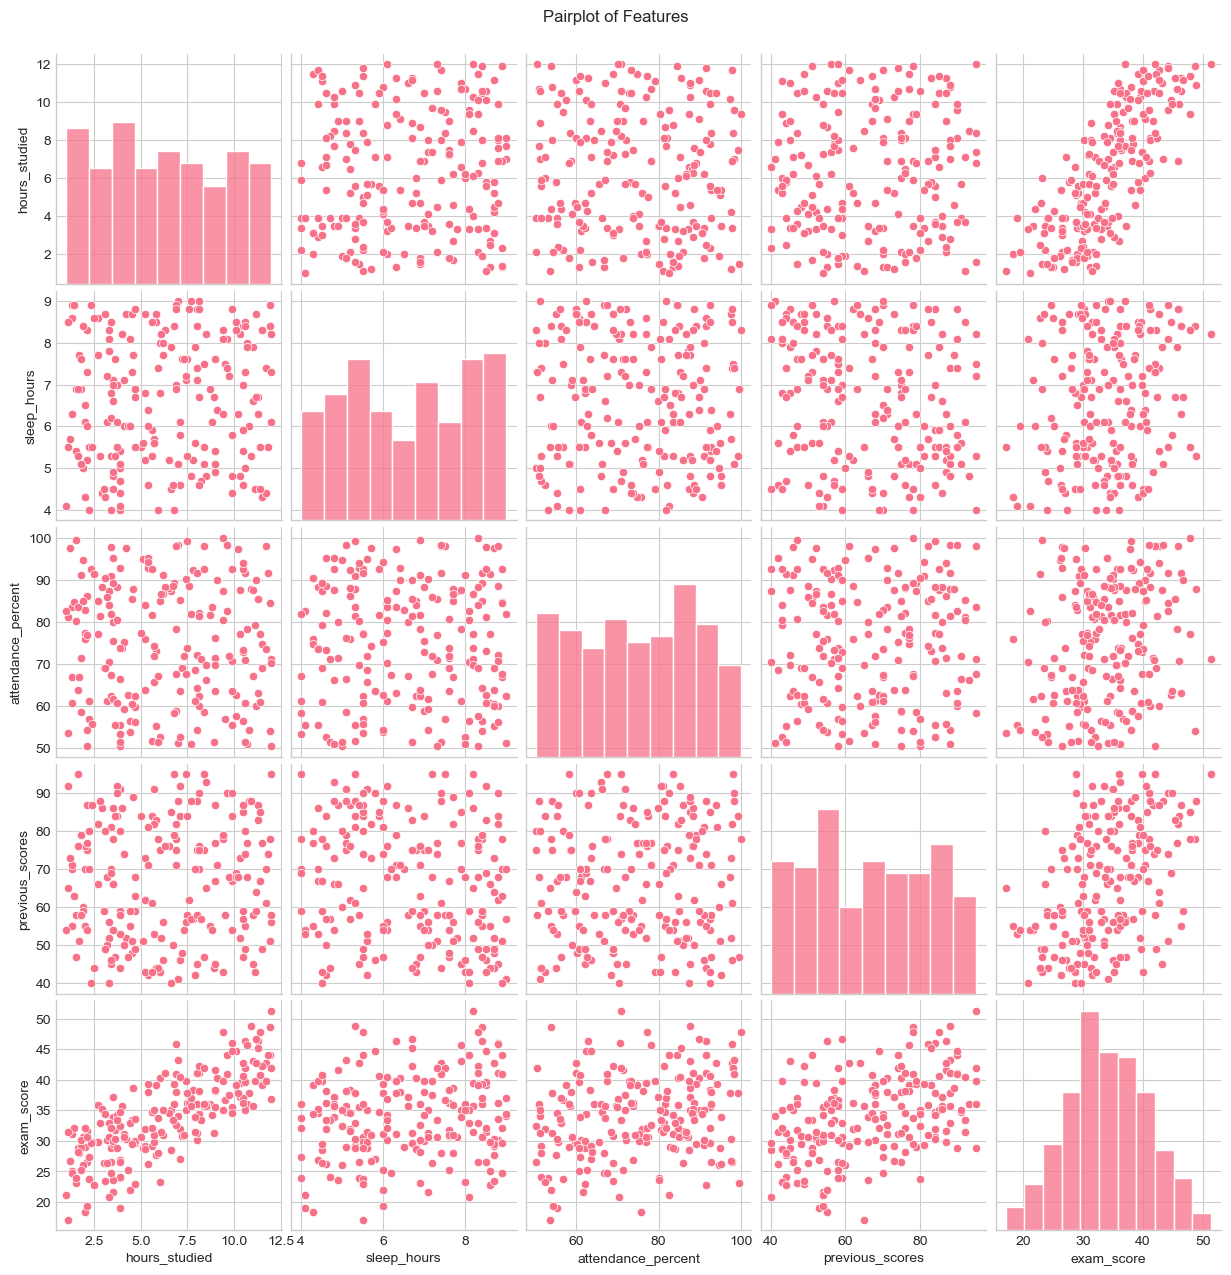

In [10]:
# 3. Pairplot of all numerical features
sns.pairplot(df.drop('student_id', axis=1))
plt.suptitle('Pairplot of Features', y=1.02)
plt.savefig('../reports/figures/pairplot.png')
plt.show()

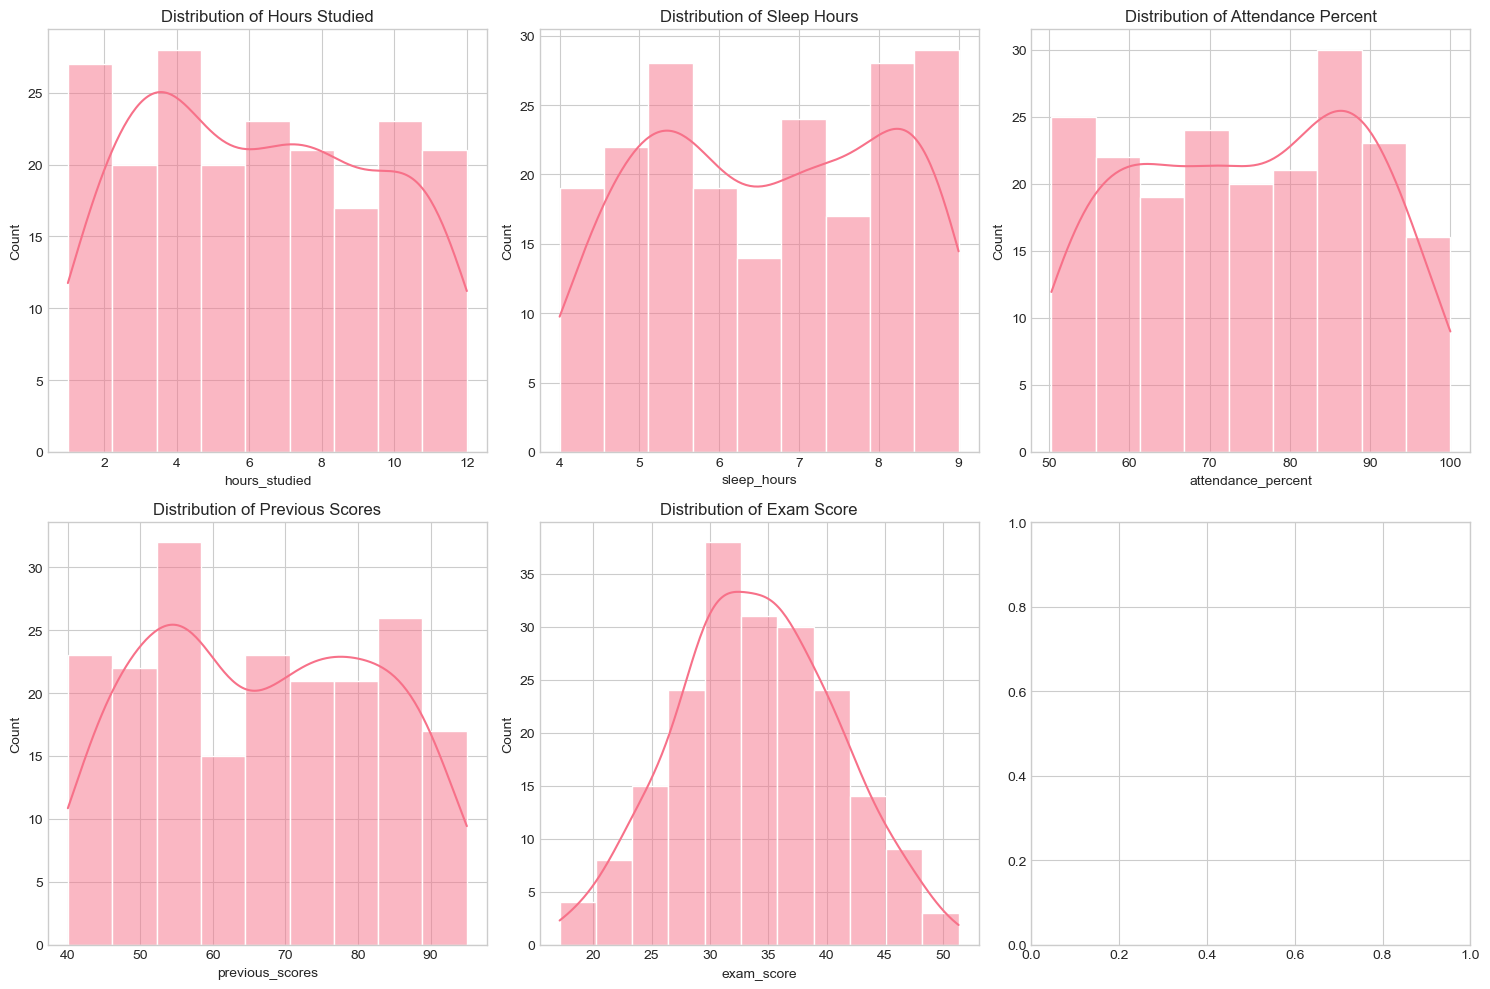

In [11]:
# 4. Distribution of each feature
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
features = ['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores', 'exam_score']

for i, feature in enumerate(features):
    row, col = i // 3, i % 3
    sns.histplot(df[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature.replace("_", " ").title()}')

plt.tight_layout()
plt.savefig('../reports/figures/feature_distributions.png')
plt.show()

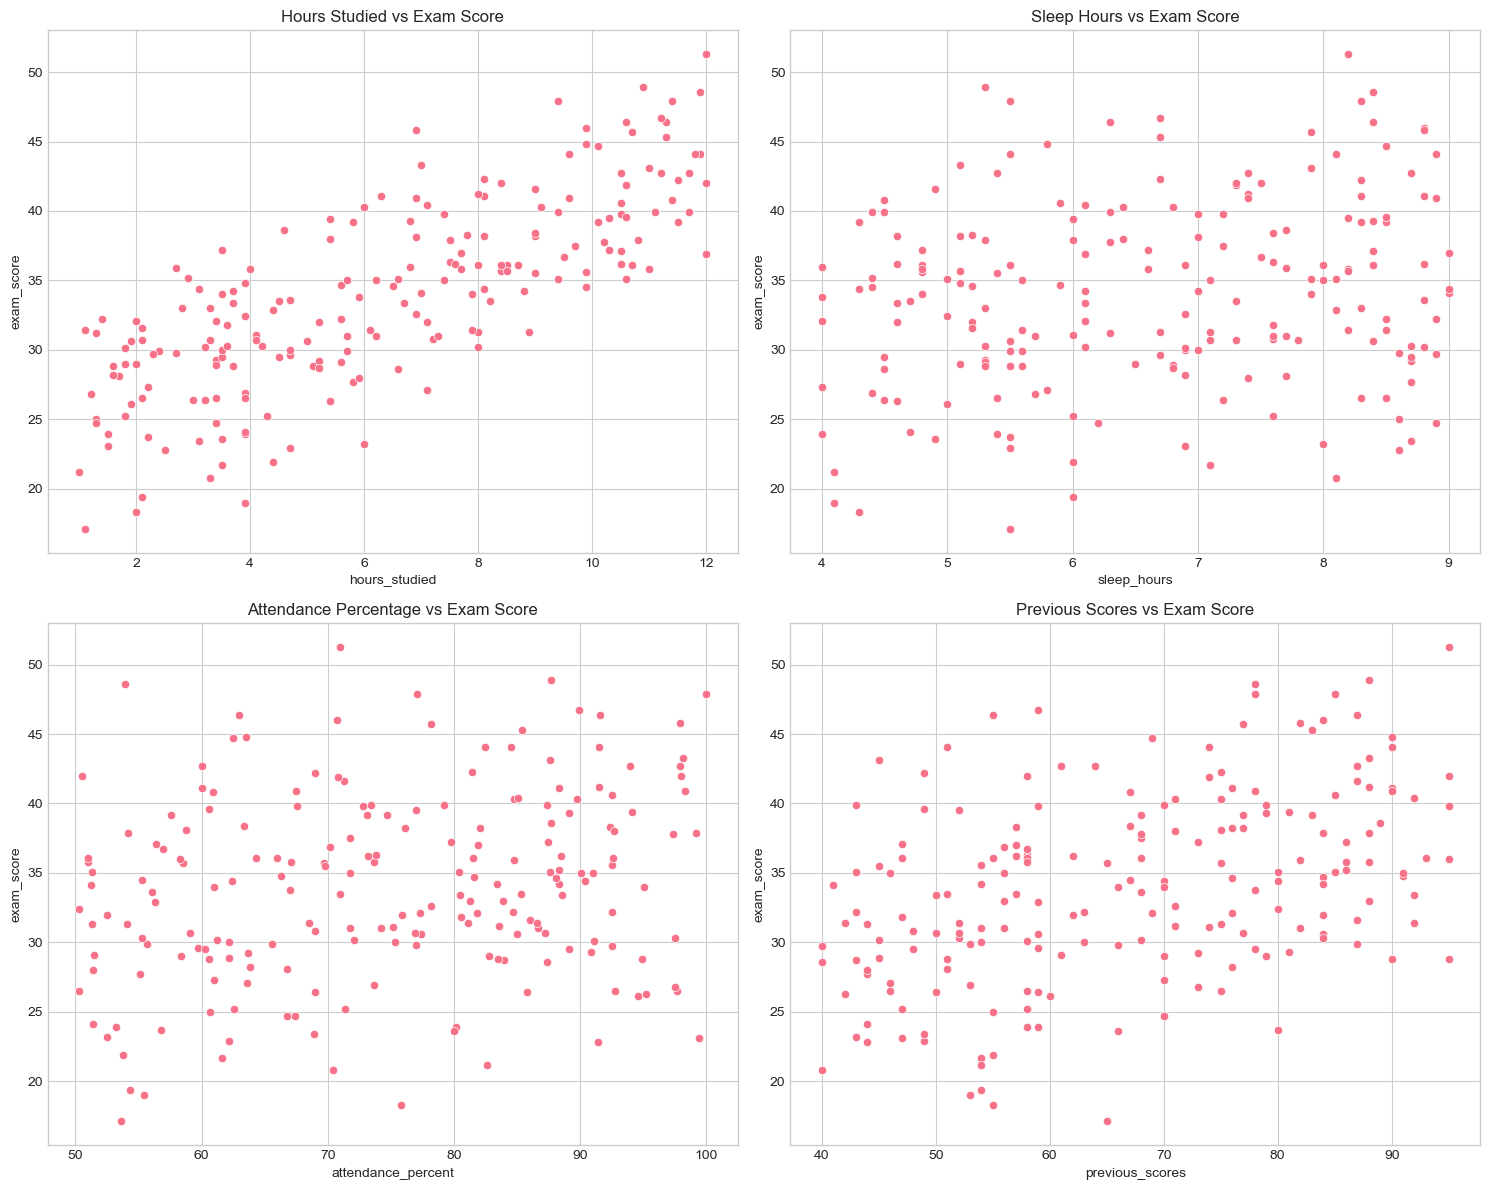

In [12]:
# 5. Relationship between features and exam score
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Hours studied vs Exam score
sns.scatterplot(data=df, x='hours_studied', y='exam_score', ax=axes[0, 0])
axes[0, 0].set_title('Hours Studied vs Exam Score')

# Sleep hours vs Exam score
sns.scatterplot(data=df, x='sleep_hours', y='exam_score', ax=axes[0, 1])
axes[0, 1].set_title('Sleep Hours vs Exam Score')

# Attendance vs Exam score
sns.scatterplot(data=df, x='attendance_percent', y='exam_score', ax=axes[1, 0])
axes[1, 0].set_title('Attendance Percentage vs Exam Score')

# Previous scores vs Exam score
sns.scatterplot(data=df, x='previous_scores', y='exam_score', ax=axes[1, 1])
axes[1, 1].set_title('Previous Scores vs Exam Score')

plt.tight_layout()
plt.savefig('../reports/figures/scatter_matrix.png')
plt.show()

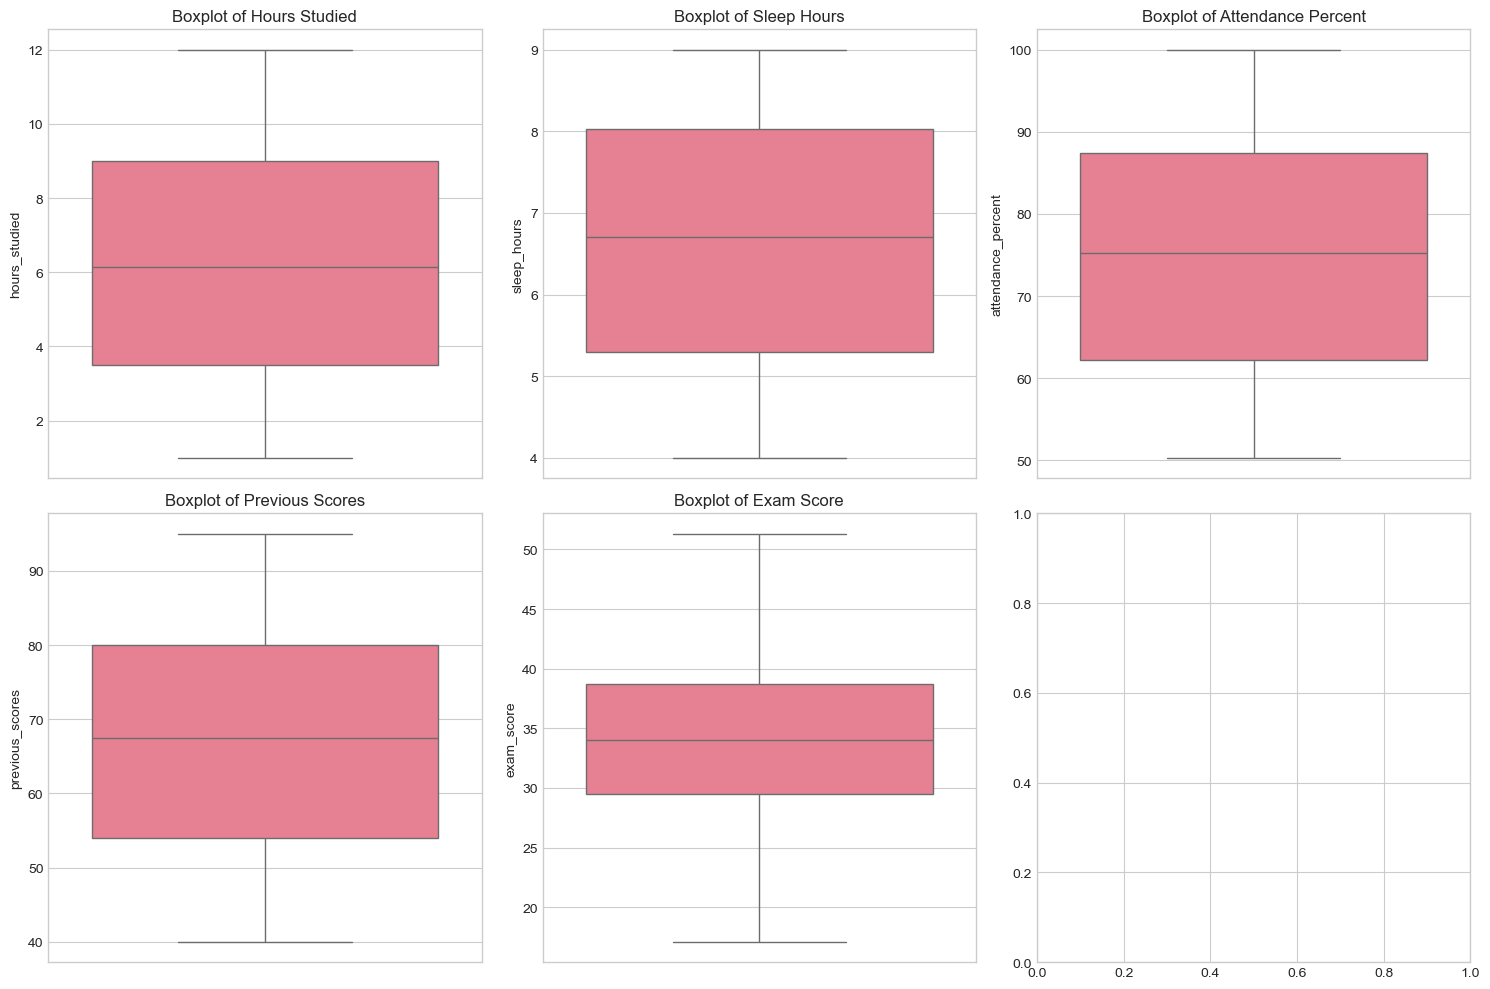

In [13]:
# 6. Boxplots to identify outliers
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
features = ['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores', 'exam_score']

for i, feature in enumerate(features):
    row, col = i // 3, i % 3
    sns.boxplot(y=df[feature], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {feature.replace("_", " ").title()}')

plt.tight_layout()
plt.show()

In [14]:
# 7. Statistical analysis
print("\n=== Correlation with Exam Score ===")
correlations = df.drop('student_id', axis=1).corr()['exam_score'].sort_values(ascending=False)
print(correlations)


=== Correlation with Exam Score ===
exam_score            1.000000
hours_studied         0.776751
previous_scores       0.431105
attendance_percent    0.225713
sleep_hours           0.188222
Name: exam_score, dtype: float64


In [16]:
# 8. Top and bottom performers analysis
top_10 = df.nlargest(10, 'exam_score')
bottom_10 = df.nsmallest(10, 'exam_score')

print("\n=== Top 10 Performers Statistics ===")
# Exclude student_id from the mean calculation
print(top_10.drop('student_id', axis=1).mean())

print("\n=== Bottom 10 Performers Statistics ===")
print(bottom_10.drop('student_id', axis=1).mean())

# Alternatively, you can specify only the numerical columns you want
print("\n=== Top 10 Performers (Selected Features) ===")
selected_features = ['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores', 'exam_score']
print(top_10[selected_features].mean())

print("\n=== Bottom 10 Performers (Selected Features) ===")
print(bottom_10[selected_features].mean())


=== Top 10 Performers Statistics ===
hours_studied         10.55
sleep_hours            7.47
attendance_percent    80.28
previous_scores       79.10
exam_score            47.59
dtype: float64

=== Bottom 10 Performers Statistics ===
hours_studied          2.85
sleep_hours            5.93
attendance_percent    66.11
previous_scores       52.30
exam_score            20.51
dtype: float64

=== Top 10 Performers (Selected Features) ===
hours_studied         10.55
sleep_hours            7.47
attendance_percent    80.28
previous_scores       79.10
exam_score            47.59
dtype: float64

=== Bottom 10 Performers (Selected Features) ===
hours_studied          2.85
sleep_hours            5.93
attendance_percent    66.11
previous_scores       52.30
exam_score            20.51
dtype: float64


In [17]:
# 9. Sleep hours analysis
print("\n=== Performance by Sleep Hours ===")
sleep_bins = [0, 5, 7, 9, 12]
sleep_labels = ['Low (<5)', 'Moderate (5-7)', 'Optimal (7-9)', 'High (>9)']
df['sleep_category'] = pd.cut(df['sleep_hours'], bins=sleep_bins, labels=sleep_labels)

sleep_stats = df.groupby('sleep_category')['exam_score'].agg(['mean', 'count'])
print(sleep_stats)


=== Performance by Sleep Hours ===
                     mean  count
sleep_category                  
Low (<5)        31.891667     36
Moderate (5-7)  33.573418     79
Optimal (7-9)   35.183529     85
High (>9)             NaN      0


In [18]:
# 10. Study hours analysis
print("\n=== Performance by Study Hours ===")
study_bins = [0, 3, 6, 9, 13]
study_labels = ['Low (<3)', 'Moderate (3-6)', 'High (6-9)', 'Very High (>9)']
df['study_category'] = pd.cut(df['hours_studied'], bins=study_bins, labels=study_labels)

study_stats = df.groupby('study_category')['exam_score'].agg(['mean', 'count'])
print(study_stats)


=== Performance by Study Hours ===
                     mean  count
study_category                  
Low (<3)        27.542857     35
Moderate (3-6)  30.081250     64
High (6-9)      36.009615     52
Very High (>9)  41.414286     49


In [19]:
# Save processed data
df.to_csv('../data/student_exam_scores_processed.csv', index=False)

print("\n=== EDA Complete ===")


=== EDA Complete ===
